# BatDetect2 - Demo

This notebook gives an example of how to run the BatDetect2 code. You can either run it locally on your own computer or on Google Colab. 

It first specifies some arguments, loads the model, selects the audio file of interest, runs the model, and finally plots the results. 

Click [here](https://colab.research.google.com/github/macaodha/batdetect2/blob/master/batdetect2_notebook.ipynb) to run it on on Google Colab. Make sure to enable GPU usage on Colab for this Notebook to make it run faster. On Colab you will also have to uncomment some lines - see below for details. 

### Load the model

In [1]:
# the following lines are only needed in Colab.
# clone the code and change directory
#!git clone https://github.com/macaodha/batdetect2
#%cd batdetect2

In [2]:
# import the necessary libraries
import os
import glob
import matplotlib.pyplot as plt

import bat_detect.utils.detector_utils as du
import bat_detect.utils.audio_utils as au
import bat_detect.utils.plot_utils as viz

In [3]:
# setup the arguments
args = du.get_default_bd_args()
args['detection_threshold'] = 0.3
args['time_expansion_factor'] = 1
#args['model_path'] = 'models/Net2DFast_UK_same.pth.tar'
args['model_path'] = 'experiments/2024_02_16__10_13_21/2024_02_16__10_13_21.pth.tar'
max_duration = 40.0

In [4]:
args['quiet'] = False
args

{'detection_threshold': 0.3,
 'time_expansion_factor': 1,
 'audio_dir': '',
 'ann_dir': '',
 'spec_slices': False,
 'chunk_size': 3,
 'spec_features': False,
 'cnn_features': False,
 'quiet': False,
 'save_preds_if_empty': True,
 'model_path': 'experiments/2024_02_16__10_13_21/2024_02_16__10_13_21.pth.tar'}

In [5]:
# load the model
model, params = du.load_model(args['model_path'])

### Select the audio file and run the model

In [6]:
# choose an audio file
#audio_file = 'example_data/audio/20170701_213954-MYOMYS-LR_0_0.5.wav'
#audio_file = '/home/jupyter-exosphere/finetuning/data/audio/human_20220730_053000.WAV'
#audio_file = '/home/jupyter-exosphere/finetuning/data/audio/human_20220727_083000.WAV'
audio_file = '/home/jupyter-exosphere/finetuning/data/audio/human_20220730_103000.WAV'
anns = '/home/jupyter-exosphere/finetuning/data/output_anns/dataset_name_TRAIN.json'
# the following lines are only needed in Colab
# alternatively you can upload your own file
#from google.colab import files
#uploaded = files.upload()
#audio_file = list(uploaded.keys())[0]

In [7]:
import pandas as pd
df = pd.read_json(anns)
df['annotation'][0]

[{'class': 'Bat',
  'end_time': 38.3671,
  'event': 'Echolocation',
  'high_freq': 51738.0,
  'individual': '0',
  'low_freq': 39218.0,
  'start_time': 38.3585},
 {'class': 'Bat',
  'end_time': 38.3671,
  'event': 'Echolocation',
  'high_freq': 51738.0,
  'individual': '0',
  'low_freq': 39218.0,
  'start_time': 38.3585},
 {'class': 'Bat',
  'end_time': 38.580799999999996,
  'event': 'Echolocation',
  'high_freq': 52237.0,
  'individual': '0',
  'low_freq': 38359.0,
  'start_time': 38.5705},
 {'class': 'Bat',
  'end_time': 38.580799999999996,
  'event': 'Echolocation',
  'high_freq': 52237.0,
  'individual': '0',
  'low_freq': 38359.0,
  'start_time': 38.5705},
 {'class': 'Bat',
  'end_time': 38.6813,
  'event': 'Echolocation',
  'high_freq': 28207.0,
  'individual': '0',
  'low_freq': 24609.0,
  'start_time': 38.6675},
 {'class': 'Bat',
  'end_time': 38.6813,
  'event': 'Echolocation',
  'high_freq': 28207.0,
  'individual': '0',
  'low_freq': 24609.0,
  'start_time': 38.6675},
 {'cla

In [8]:
# run the model
results = du.process_file(audio_file, model, params, args, max_duration=max_duration)

Loading Audio File into Cache:  /home/jupyter-exosphere/finetuning/data/audio/human_20220730_103000.WAV
15 call(s) detected above the threshold.
species name                  probablity present
Bat                           1.0


### Print the results

In [9]:
# print summary info for the individual detections 
print('Results for ' + results['pred_dict']['id'])
print('{} calls detected\n'.format(len(results['pred_dict']['annotation'])))

print('time\tprob\tlfreq\tspecies_name')
for ann in results['pred_dict']['annotation']:
    print('{}\t{}\t{}\t{}'.format(ann['start_time'], ann['class_prob'], ann['low_freq'], ann['class']))

Results for human_20220730_103000.WAV
15 calls detected

time	prob	lfreq	species_name
37.6041	0.463	38359	Bat
38.3556	0.924	39218	Bat
38.5662	0.934	38359	Bat
38.6653	0.68	24609	Bat
38.6694	0.571	38359	Bat
38.7603	0.9	39218	Bat
38.8676	0.497	38359	Bat
38.9626	0.941	39218	Bat
39.0599	0.969	39218	Bat
39.159	0.667	37500	Bat
39.2581	0.958	38359	Bat
39.3324	0.674	39218	Bat
39.4397	0.914	38359	Bat
39.5554	0.935	40078	Bat
39.832	0.953	39218	Bat


### Visualise the detections

In [10]:
# read the audio file 
sampling_rate, audio = au.load_audio_file(audio_file, args['time_expansion_factor'], params['target_samp_rate'], params['scale_raw_audio'], max_duration=max_duration)
duration = audio.shape[0] / sampling_rate
print('File duration: {} seconds'.format(duration))

Loading Audio File into Cache:  /home/jupyter-exosphere/finetuning/data/audio/human_20220730_103000.WAV
File duration: 40.0 seconds


In [11]:
params['fft_win_length']

0.004129032258064516

In [18]:
# generate spectrogram for visualization
params['fft_overlap'] = 0.75
params['fft_win_length'] = 0.4129032258064516
spec, spec_viz = au.generate_spectrogram(audio, sampling_rate, params, True, False)

In [19]:
spec.shape

(45419, 384)

In [15]:
ground_truth = df['annotation'][0]
params['fft_overlap']

0.75

39.94838709677419


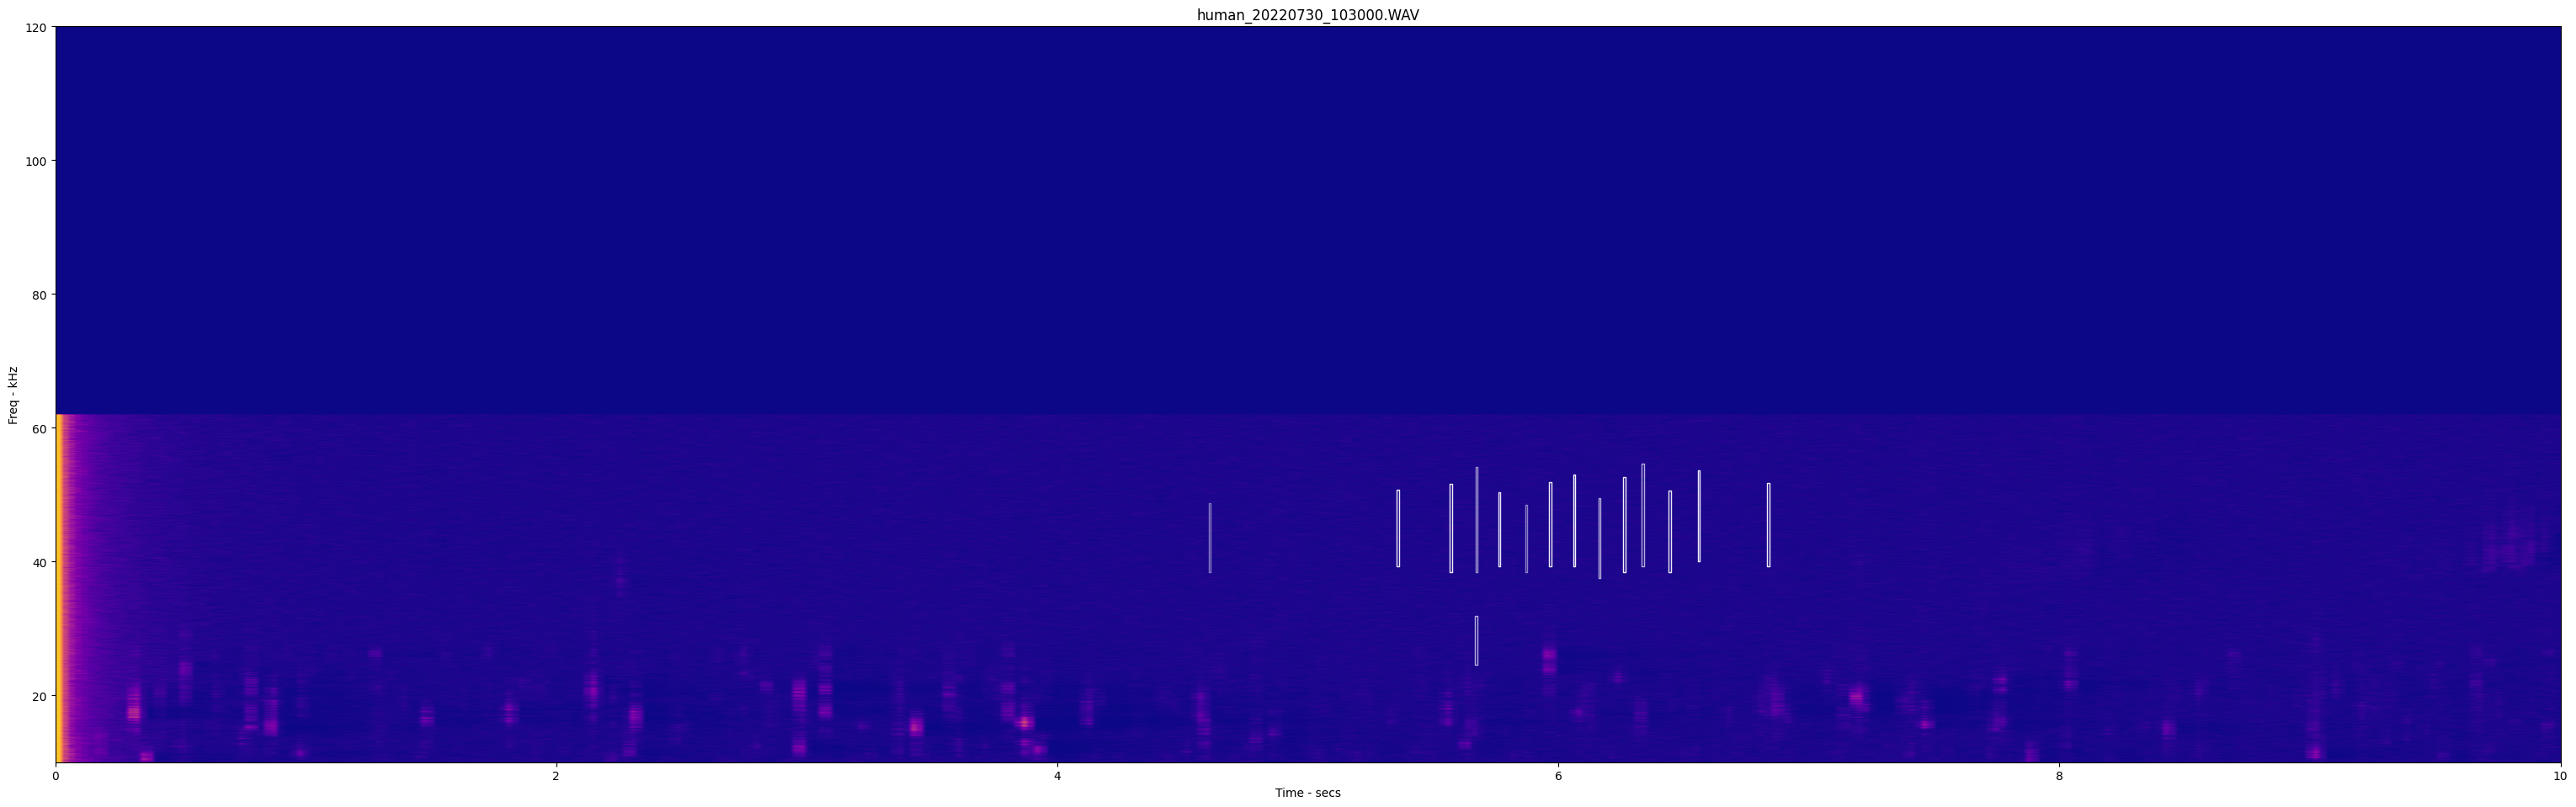

In [16]:
# display the detections on top of the spectrogram
# note, if the audio file is very long, this image will be very large - best to crop the audio first
start_time = 33.0
detections = [ann for ann in results['pred_dict']['annotation']]
fig = plt.figure(1, figsize=((spec.shape[1]/10, spec.shape[0]/4000)), dpi=100, frameon=False)
spec_duration = au.x_coords_to_time(spec.shape[1], sampling_rate, params['fft_win_length'], params['fft_overlap'])
print(spec_duration)
viz.create_box_image(spec, fig, detections, start_time, spec_duration, 10, params, spec.max()*1.1, False, False)
plt.ylabel('Freq - kHz')
plt.xlabel('Time - secs')
plt.title(os.path.basename(audio_file))
plt.show()

39.94838709677419


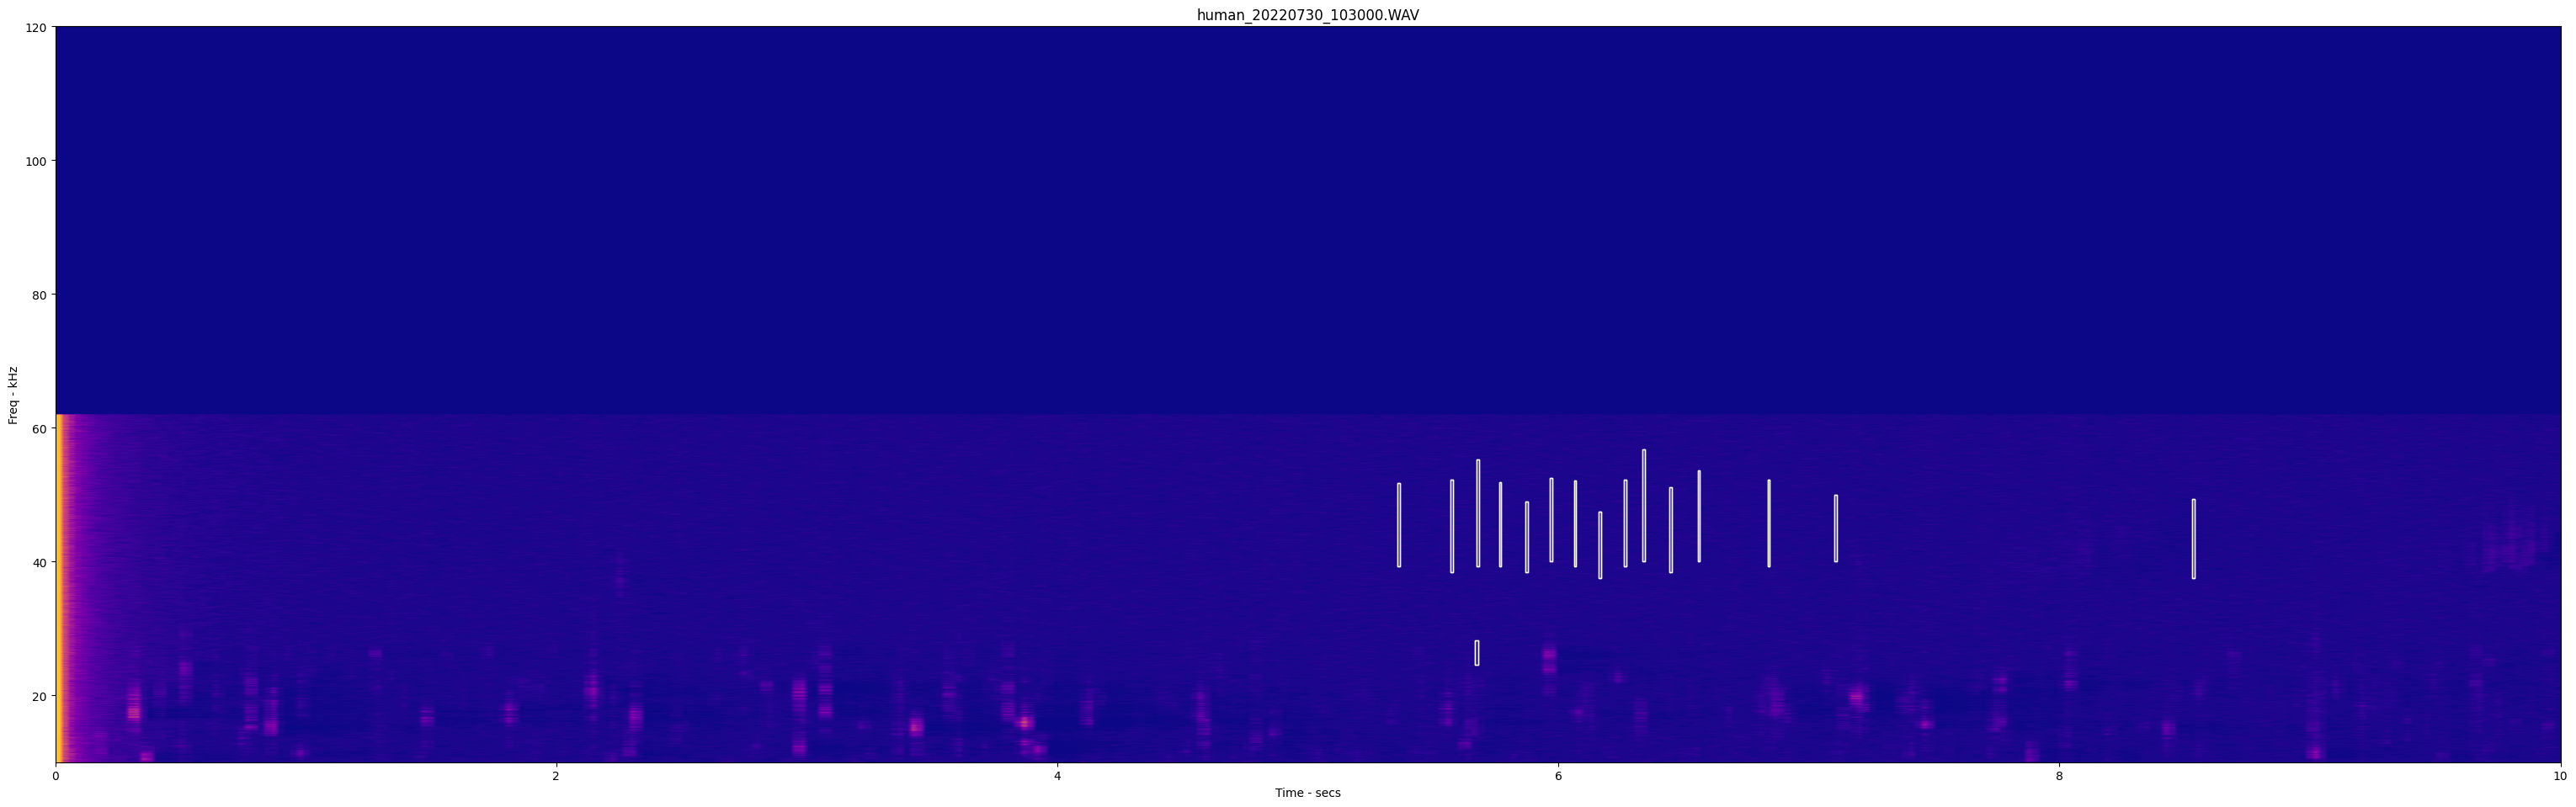

In [17]:
# display the detections on top of the spectrogram
# note, if the audio file is very long, this image will be very large - best to crop the audio first
start_time = 33.0
detections = ground_truth
fig = plt.figure(1, figsize=((spec.shape[1]/10, spec.shape[0]/4000)), dpi=100, frameon=False)
spec_duration = au.x_coords_to_time(spec.shape[1], sampling_rate, params['fft_win_length'], params['fft_overlap'])
print(spec_duration)
viz.create_box_image(spec, fig, detections, start_time, spec_duration, 10, params, spec.max()*1.1, False, False)
plt.ylabel('Freq - kHz')
plt.xlabel('Time - secs')
plt.title(os.path.basename(audio_file))
plt.show()